# Support Vector Machines - SVM
## Laboratorio 3 - Diego Córdova: 20212
> En este archivo se realiza unicamente la exploracion de datos

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

##  Analisis Exploratorio

### Identifica el tipo de archivo .data y la forma de leerlo
El archivo es un csv separado por comas. Este puede leerse con el siguiente código.

In [5]:
# Imports
from sklearn.model_selection import train_test_split
from quickda.explore_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv 

In [6]:
data = pd.read_csv('./wine_fraud.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### Estudia las variables cuantitativas mediante técnicas de estadística descriptiva

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos

Variables numericas

Outlier Analysis - Boxplot


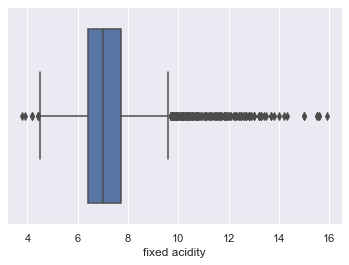

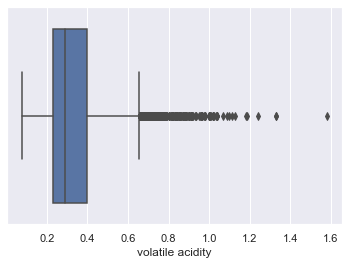

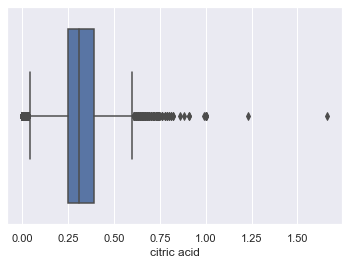

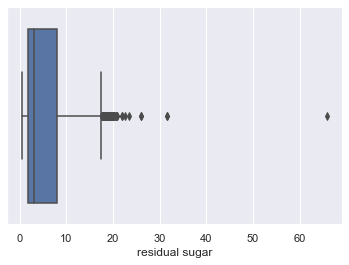

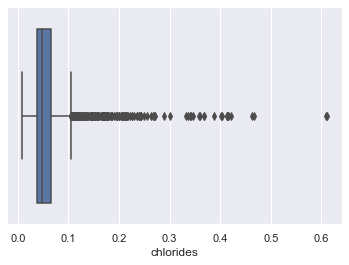

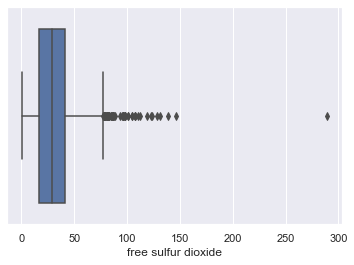

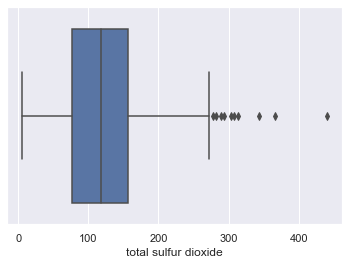

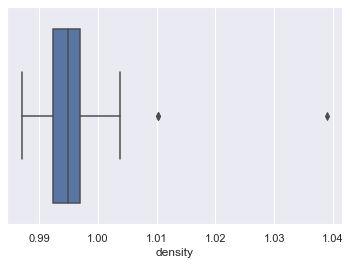

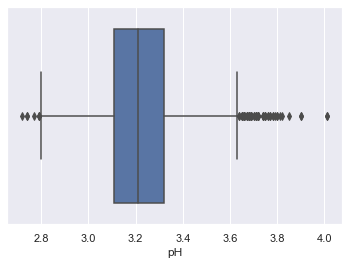

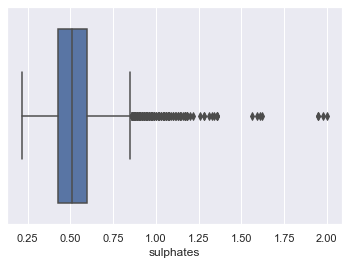

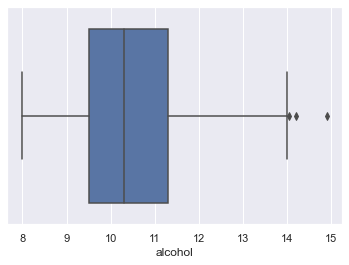

Distribution Analysis - Histogram


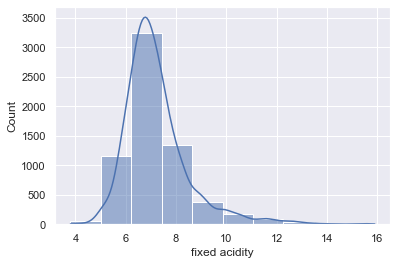

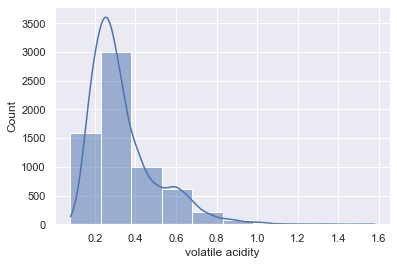

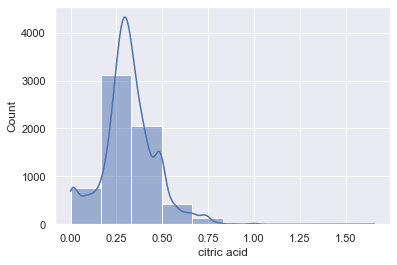

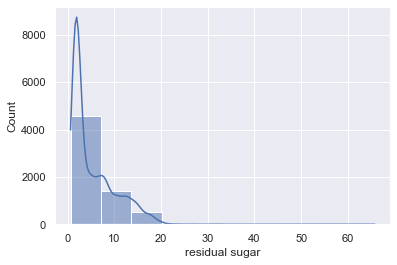

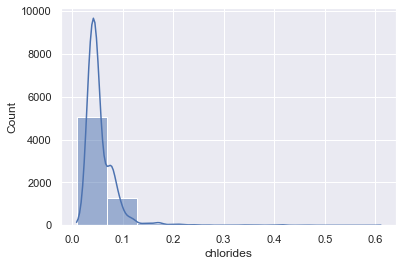

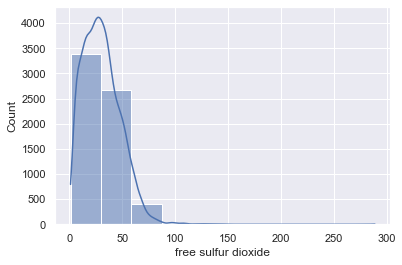

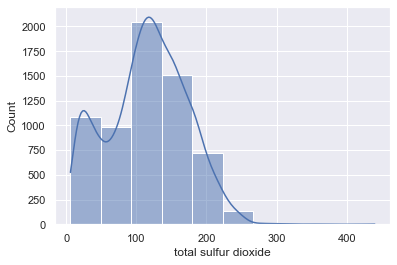

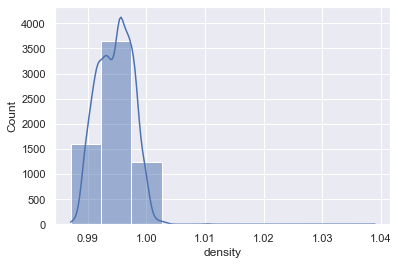

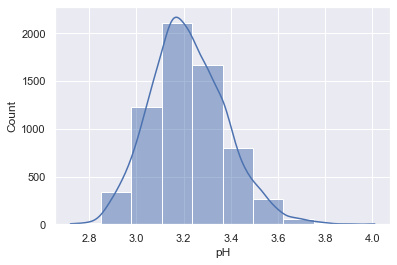

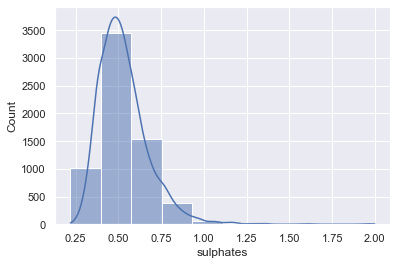

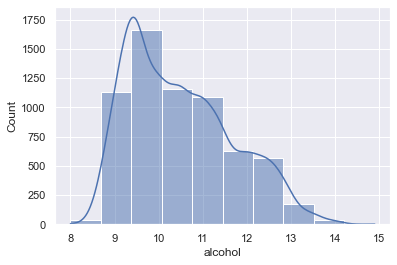

In [67]:
eda_num(data)

### Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.

In [62]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


d:\Archivos de programa\Python\3.10\lib\site-packages\quickda\explore_numeric.py:28: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

d:\Archivos de programa\Python\3.10\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00


<AxesSubplot:>

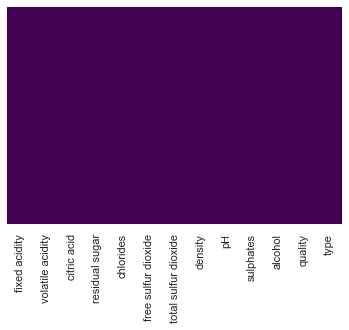

In [61]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

No hay datos nulos, por lo que no es neceario tomar acciones al respecto

### - Estudia las variables categóricas
### - Elabora gráficos de barra, tablas de frecuencia y de proporciones
### - Elabora gráficos adecuados según el tipo de dato que representan

Bar Plot of type


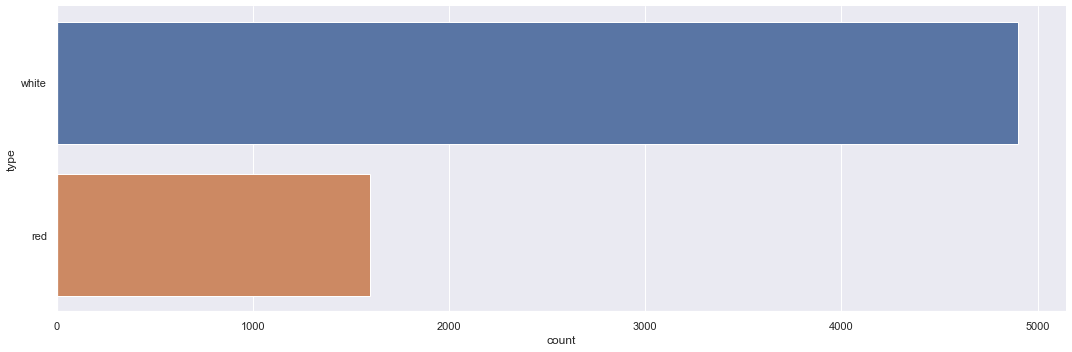

Summary of type
Bar Plot of quality


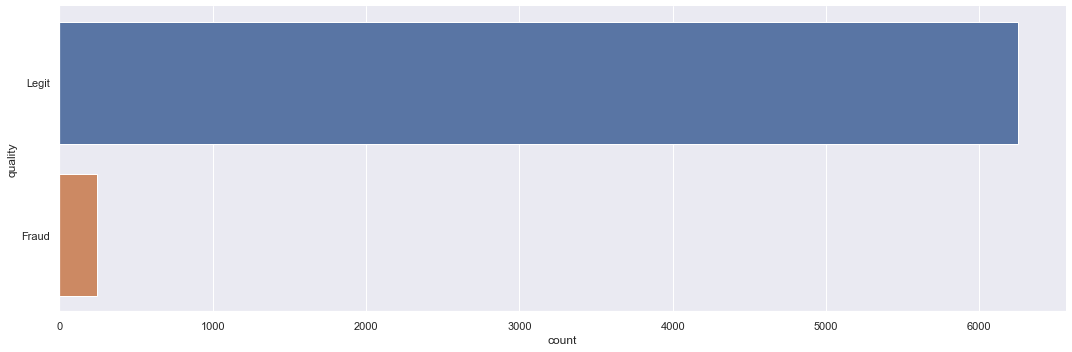

Summary of quality
Bar Plot of type with respect to quality


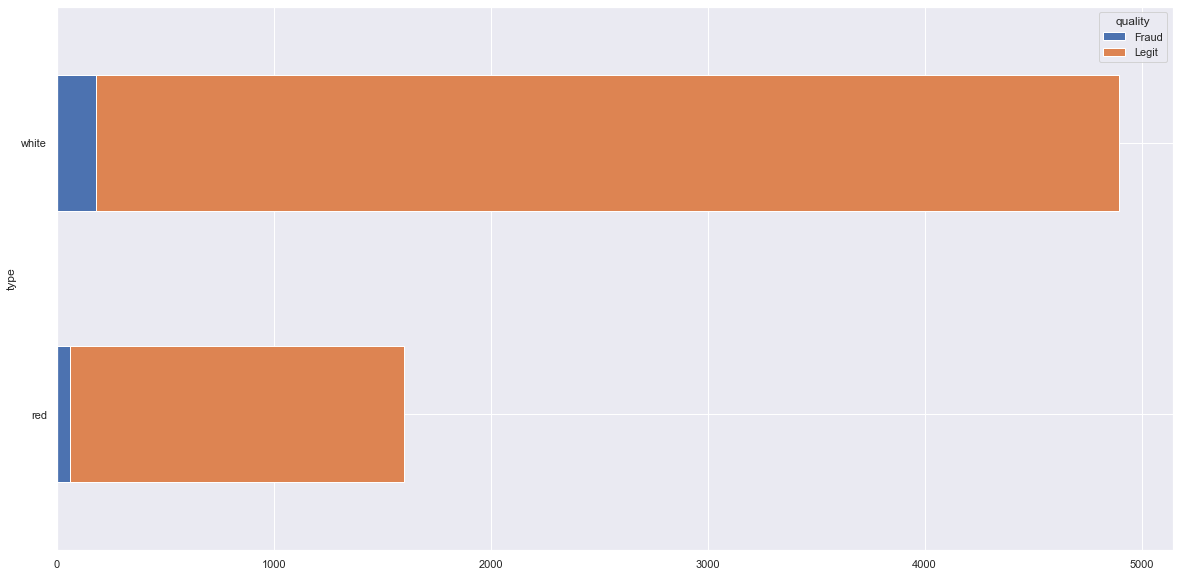

Crosstabulation of type across quality


quality,Fraud,Legit
type,,
white,0.04,0.96
red,0.04,0.96


In [78]:
eda_cat(data=data, x='type')
eda_cat(data=data, x='quality')
eda_cat(data=data, x='type', y='quality')

In [76]:

# Crear la tabla de frecuencias con la variable type
freq_table = pd.crosstab(index=data['type'], columns="count")
print('Frecuencia de type')
freq_table

Frecuencia de type


col_0,count
type,
red,1599
white,4898


In [77]:
# Crear la tabla de frecuencias con la variable quality
freq_table = pd.crosstab(index=data['quality'], columns="count")
print('Frecuencia de quality')
freq_table

Frecuencia de quality


col_0,count
quality,
Fraud,246
Legit,6251
